In [1]:

%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from qick import *
from qick.helpers import gauss
from tqdm import tqdm_notebook as tqdm

import time
import os
import sys
sys.path.append('/home/xilinx/jupyter_notebooks/')
sys.path.append('C:\\_Lib\\python\\rfsoc\\rfsoc_multimode\\example_expts')
import scipy as sp
import json
from scipy.fft import fft, fftfreq

from slab.instruments import *
from slab.experiment import Experiment
from slab.datamanagement import SlabFile
from slab import get_next_filename, AttrDict
from slab import Experiment, dsfit, AttrDict

# Figure params
plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams.update({'font.size': 14})

Warning serial library import failed.
Could not load InstrumentManagerWindow
Could not import QickInstrument, try install qick package
Could not load AD5780 dac 
Could not load labbrick
Could not load Autonics TM4 Driver


In [2]:
from slab.dsfit import *
import os
from scipy.interpolate import griddata
from numpy import mgrid, array, zeros,abs,pi,cos,transpose, linspace
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from tempfile import TemporaryFile
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 15}
import json
from h5py import File
from datetime import datetime
import time
from slab.datamanagement import SlabFile
import matplotlib.pyplot as plt
import numpy as np
import os
import json
from slab.dsfit import *
from scipy.optimize import curve_fit
# import experiments.fitting as fitter
from numpy.linalg import inv

## Import modules from parent and multimode expts

In [3]:
import json
import os

# Get the current working directory
path = os.getcwd()
print("Current Path:", path)

# Isolate the parent directory
parent_path = os.path.dirname(path)
print("Parent Path:", parent_path)

# Add the parent path to the sys.path
sys.path.append(parent_path)

Current Path: c:\_Lib\python\multimode_expts\analysis_notebooks
Parent Path: c:\_Lib\python\multimode_expts


In [4]:
import sys

# Path to add
expts_path = 'C:\\_Lib\\python\\multimode_expts'

# Add the path to the system path at the highest priority
if expts_path not in sys.path:
    sys.path.insert(0, expts_path)
    print('Path added at highest priority')

# Verify the path is added
print(sys.path)


Path added at highest priority
['C:\\_Lib\\python\\multimode_expts', 'c:\\_Lib\\python\\multimode_expts\\analysis_notebooks', 'C:\\_Lib\\python', 'C:\\_Lib\\python\\slab', 'C:\\_Lib\\python\\qick\\qick_lib', 'C:\\_Lib\\python\\rfsoc\\rfsoc_multimode\\example_expts', 'c:\\_Lib\\python\\multimode_expts\\analysis_notebooks', 'c:\\Users\\26049\\.conda\\envs\\slab\\python38.zip', 'c:\\Users\\26049\\.conda\\envs\\slab\\DLLs', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib', 'c:\\Users\\26049\\.conda\\envs\\slab', '', 'C:\\Users\\26049\\AppData\\Roaming\\Python\\Python38\\site-packages', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\easy_lmfit-1.0-py3.8.egg', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\attrdict-2.0.1-py3.8.egg', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\win32', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\win32\\lib', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\s

In [5]:
from multimode_expts.fit_display import *

importing from path  C:\_Lib\python\multimode_expts\experiments\clifford_averager_program.py
imported experiments.clifford_averager_program
importing from path  C:\_Lib\python\multimode_expts\experiments\fitting.py
imported experiments.fitting
importing from path  C:\_Lib\python\multimode_expts\experiments\qram_protocol_timestepped.py
imported experiments.qram_protocol_timestepped
importing from path  C:\_Lib\python\multimode_expts\experiments\qubit_cavity
imported experiments.qubit_cavity.amplitude_rabi_f0g1
imported experiments.qubit_cavity.displacement_enhanced_sideband
imported experiments.qubit_cavity.displace_amplitude_calibration
imported experiments.qubit_cavity.displace_pulse_probe
imported experiments.qubit_cavity.ecd
imported experiments.qubit_cavity.ecd_backup
imported experiments.qubit_cavity.ecd_read_spec
imported experiments.qubit_cavity.non_demolution_readout
imported experiments.qubit_cavity.out_and_back
imported experiments.qubit_cavity.photo_resolved_pulse_probe
impo

In [6]:
import experiments.fitting as fitter
from numpy.linalg import inv

# config

In [151]:
curr_path = os.getcwd()
config_file = expts_path+'\\config_rfsoc_ziqian.yml'
config_path = config_file
print('Config will be', config_path)


Config will be C:\_Lib\python\multimode_expts\config_rfsoc_ziqian.yml


In [152]:
qubit_i = 0
import yaml
with open(config_file, 'r') as cfg_file:
    yaml_cfg = yaml.safe_load(cfg_file)
yaml_cfg = AttrDict(yaml_cfg)

# Exp path

In [7]:

# print("path: ", path)

"""Reopen saved data"""
def prev_data(expt_path, filename):
    temp_data_file = expt_path+'\\'+filename
    with SlabFile(temp_data_file) as a:
        attrs = dict()
        for key in list(a.attrs):
            attrs.update({key:json.loads(a.attrs[key])})
        keys = list(a)
        temp_data = dict()
        for key in keys:
            temp_data.update({key:np.array(a[key])})
        # print(f'Extracted data and attrs {list(a.attrs)}')
    return temp_data, attrs
data_parent =  r'H:\Shared drives\SLab\Multimode\experiment\240911'
expt_path=data_parent+'\\data1'
print('Data are extracted from', expt_path)

Data are extracted from H:\Shared drives\SLab\Multimode\experiment\240911\data1


# F0g1 Spectroscopy

Found peak in amps at [MHz] 2012.238353420051, HWHM 0.2694219184542896
Found peak in I at [MHz] 2012.2156833268537, HWHM 0.3813691592634866
Found peak in Q at [MHz] 2012.231621175017, HWHM -0.32455566194472873


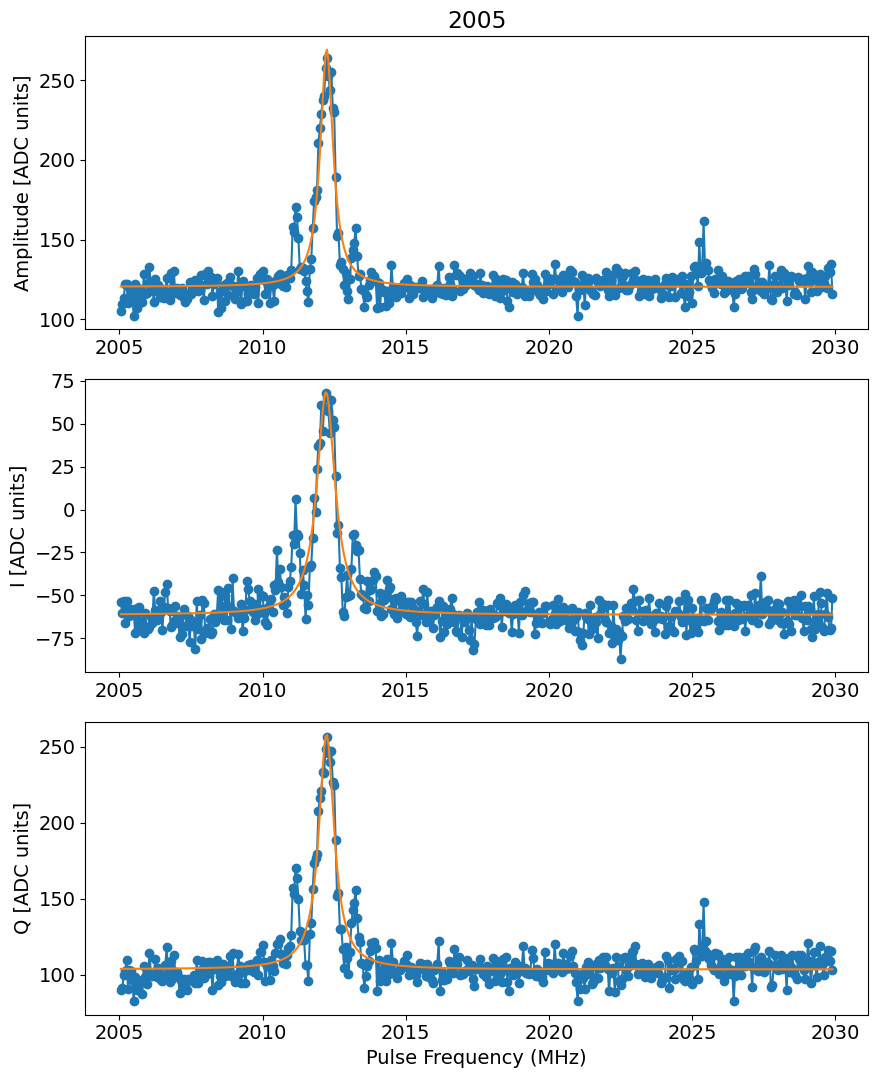

In [195]:
temp_data, attrs = prev_data(expt_path, '00018_PulseProbeF0g1SpectroscopyExperiment.h5')
#temp_data, attrs = prev_data(expt_path, '00122_fluxspectroscopy_f0g1_dc_flux_sweep.h5')

qubit_spectroscopy_display(temp_data, title=attrs['config']['expt']['start'], vlines=None)
# gain from attrs

# Length Rabi Sweep

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


File 00502_length_rabi_f0g1_sweep.h5 not found
File 00503_length_rabi_f0g1_sweep.h5 not found
File 00504_length_rabi_f0g1_sweep.h5 not found
File 00505_length_rabi_f0g1_sweep.h5 not found
File 00506_length_rabi_f0g1_sweep.h5 not found
File 00507_length_rabi_f0g1_sweep.h5 not found
File 00508_length_rabi_f0g1_sweep.h5 not found
File 00509_length_rabi_f0g1_sweep.h5 not found


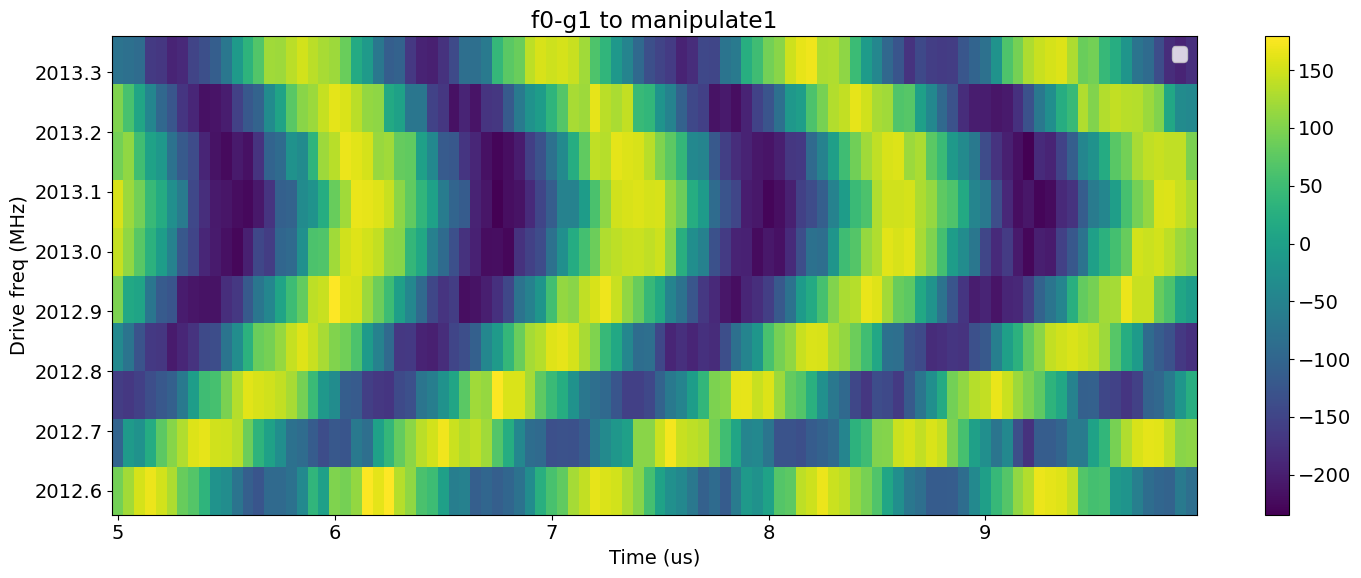

In [804]:
# file_list = np.arange(427, 450, 1) # -------
# file_list = np.concatenate(([470, 471, 472], np.arange(461, 469, 1))) # -------
file_list = np.arange(474, 488, 1) # -------
file_list = np.arange(492, 510, 1)
y_list = []
freq_list = []
name = '_length_rabi_f0g1_sweep.h5'
normalize = False


for file_no in file_list:
    full_name = str(file_no).zfill(5)+name
    try:
        temp_data, attrs = prev_data(expt_path, full_name)  # ef
        signal_y = temp_data['avgi'][0:-1]

        
        len_x = temp_data['xpts'][0:-1]
        y_list.append(signal_y)
        freq_list.append(attrs['config']['expt']['freq'])
    except FileNotFoundError:
        print(f'File {full_name} not found')
        continue

plot_sideband_sweep(len_x, freq_list, np.array(y_list), hlines=[], vlines=None, normalize = normalize, title="f0-g1 to manipulate1")

## Length rabi f0-g1 M1

[204.22964355   0.88906637  93.85946681  94.23005357 -20.28766618
  -2.93302302]
Decay from avgi [us] 94.23005357269454
Rate [MHz] 0.8890663658895916
Pi length from avgi data [us]: 0.5503292865661726
	Pi/2 length from avgi data [us]: 0.2691354301886993
Fit params:  [204.22964355   0.88906637  93.85946681  94.23005357 -20.28766618
  -2.93302302]

Decay from avgq [us] 45.74599043997323
Rate [MHz] 0.8905705953019697
Pi length from avgq data [us]: 0.5526038364012268
Pi/2 length from avgq data [us]: 0.2763019182006134
Fit params:  [199.66559091   0.8905706   92.83221808  45.74599044 -93.15399077
  -2.93302455]


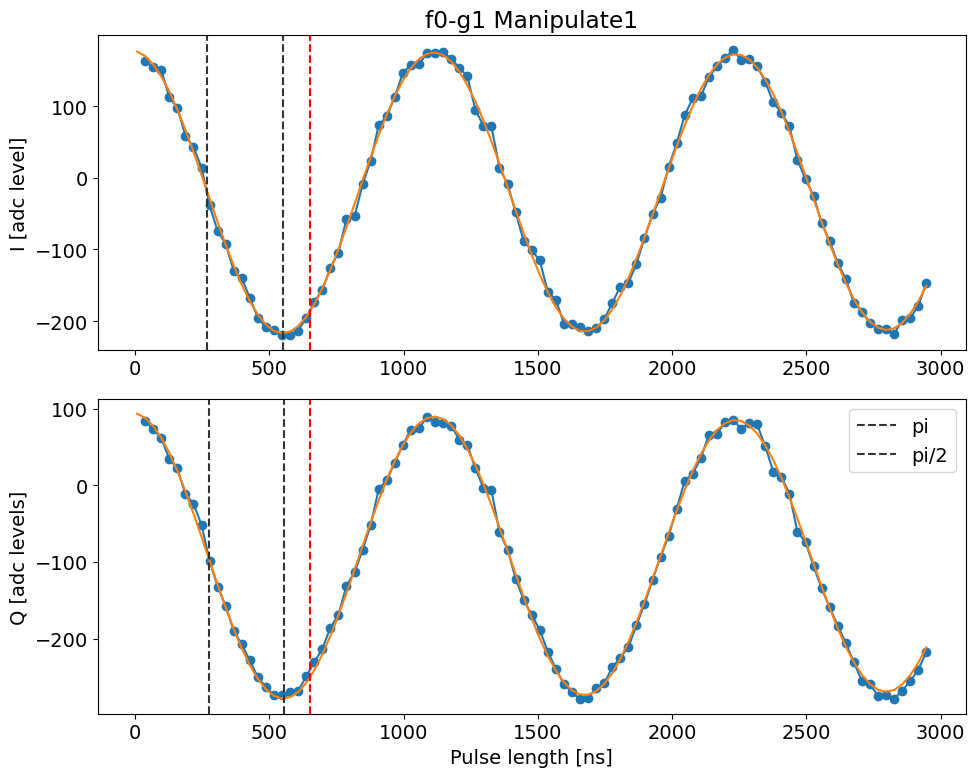

In [419]:
temp_data, attrs = prev_data(expt_path, '00014_LengthRabiGeneralF0g1Experiment.h5')  #
Ilist2 = length_rabi_display(temp_data, fit=True, fitparams=[None, None,None,None,None,None ],
                              vlines = [650],
                      normalize= [False, 'g_data', 'f_data'],
                       active_reset = False,  title='f0-g1 Manipulate1')

## Manipulate 1 T1

Fit T1 avgi [us]: 153.28652568468854
Fit T1 avgq [us]: 73.8963969301676


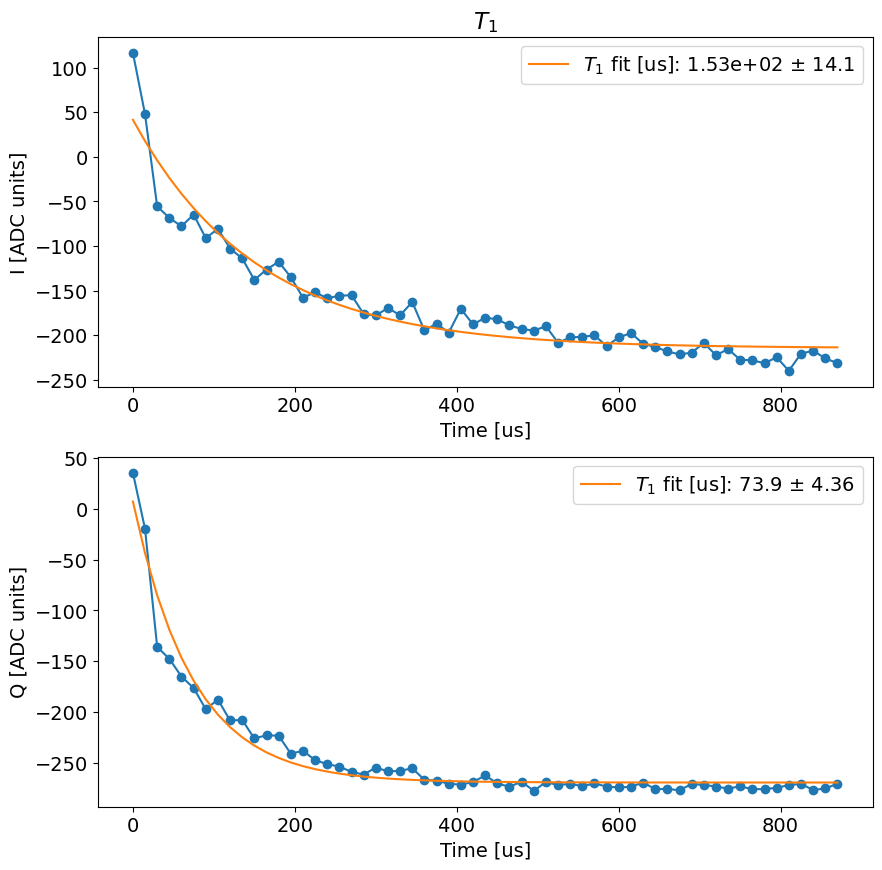

In [379]:
# DC flux=0.27, expid=1
# DC flux=0.17, expid=2
# temp_data, attrs = prev_data(expt_path, '00010_T1CavityExperiment.h5')
temp_data, attrs = prev_data(expt_path, '00086_cavity_t1_dc_flux_sweep_new.h5')
t1_display(data = temp_data, fit = True, active_reset = False)

In [307]:
attrs

{'config': {'prepulse_qubit': {'freq': [3568.1751638611518],
   'length': [0.06],
   'gain': [30],
   'phase': [0],
   'repeat_time': 10},
  'device': {'qubit': {'T1': 127.0,
    'f_ge': 3568.1751638611518,
    'f_ge_resolved': 3568.1751638611518,
    'f_ge_idle': 3568.1751638611518,
    'f_ef': 3425.5564066067,
    'f_ef_idle': 3425.5564066067,
    'ramp_sigma': 0.005,
    'ramp_sigma_num': 3,
    'pulses': {'pi_ge': {'gain': 10716,
      'sigma': 0.035,
      'length': 0,
      'type': 'gauss'},
     'pi_ge_ftop': {'gain': 3000,
      'sigma': 0.005,
      'length': 0.190914187445986,
      'type': 'flat_top'},
     'pi_ge_fast': {'gain': 10682,
      'sigma': 0.035,
      'length': 0,
      'type': 'gauss'},
     'pi_ge_resolved': {'gain': 50,
      'sigma': 0.005,
      'length': 6.553697146578866,
      'type': 'flat_top',
      'repeat_no': 1},
     'hpi_ge': {'gain': 5510, 'length': 0, 'sigma': 0.035, 'type': 'gauss'},
     'hpi_ge_ftop': {'gain': 3000,
      'sigma': 0.005,
   

# F0g1 Scan Dataset as a function of Coupler DC Flux

In [424]:
# Original lists
currents = [0.08, 0.12, 0.22, 0.32, 0.5, 0.27, 0.17, -0.1, -0.2, 0, 0.6, 0.55, 0.4, -0.15, -0.05]
f0g1_freqs = [
    1993.55, 1996.45, 2002.55, 2007, 2011.97, 
    2005, 1999.7, 1980.8, 1977.7, 1987.46, 2013.8, 2012.93, 2009.6, 1978.6, 1983.84
]
pi_lengths = [
    0.562878407, 0.573263647, 0.597216575, 0.604688822, 0.608122803, 
    0.607997218, 0.588880852, 0.556092728, 0.55045291, 0.556268435, 0.61,0.608686712, 0.606480529, 
    0.546402768, 0.5526038364012268



]

# Combine the lists and sort by currents
combined = sorted(zip(currents, f0g1_freqs, pi_lengths))

# Unzip the combined list back into separate lists
currents, f0g1_freqs, pi_lengths = zip(*combined)

# Convert back to lists
currents = list(currents)
f0g1_freqs = list(f0g1_freqs)
pi_lengths = list(pi_lengths)

print("Sorted currents:", currents)
print("Updated f0g1_freqs:", f0g1_freqs)
print("Updated pi_lengths:", pi_lengths)



Sorted currents: [-0.2, -0.15, -0.1, -0.05, 0, 0.08, 0.12, 0.17, 0.22, 0.27, 0.32, 0.4, 0.5, 0.55, 0.6]
Updated f0g1_freqs: [1977.7, 1978.6, 1980.8, 1983.84, 1987.46, 1993.55, 1996.45, 1999.7, 2002.55, 2005, 2007, 2009.6, 2011.97, 2012.93, 2013.8]
Updated pi_lengths: [0.55045291, 0.546402768, 0.556092728, 0.5526038364012268, 0.556268435, 0.562878407, 0.573263647, 0.588880852, 0.597216575, 0.607997218, 0.604688822, 0.606480529, 0.608122803, 0.608686712, 0.61]


In [425]:
# now creating a dataframe 
df = pd.DataFrame({'currents': currents, 'f0g1_freqs': f0g1_freqs, 'pi_lengths': pi_lengths})
df

,currents,f0g1_freqs,pi_lengths
0,-0.20,1977.70,0.550453
1,-0.15,1978.60,0.546403
2,-0.10,1980.80,0.556093
3,-0.05,1983.84,0.552604
4,0.00,1987.46,0.556268
5,0.08,1993.55,0.562878
6,0.12,1996.45,0.573264
7,0.17,1999.70,0.588881
8,0.22,2002.55,0.597217
9,0.27,2005.00,0.607997


Text(0, 0.5, 'Manipulate1 Frequency (GHz)')

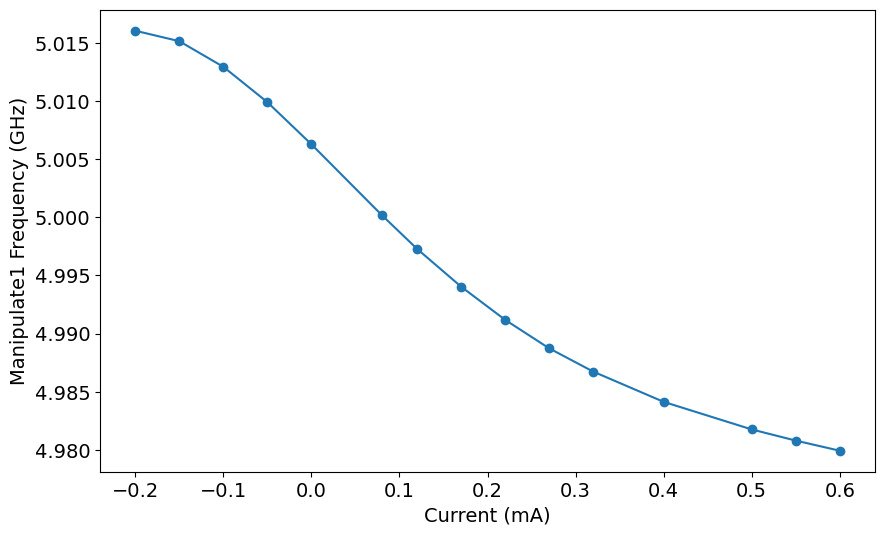

In [426]:
qubit_gf = yaml_cfg.device.qubit.f_ge[0] + yaml_cfg.device.qubit.f_ef[0]
# plot current vs f0g1_freqs
plt.plot(df['currents'], (-1 * np.array(df['f0g1_freqs'].values) + qubit_gf) * 1e-3, 'o-')
plt.xlabel('Current (mA)')
plt.ylabel('Manipulate1 Frequency (GHz)')

## Prepping for T1 scan on manipulate using interpolation of refernce data 

Interpolated frequency at current 0.55: 2012.93


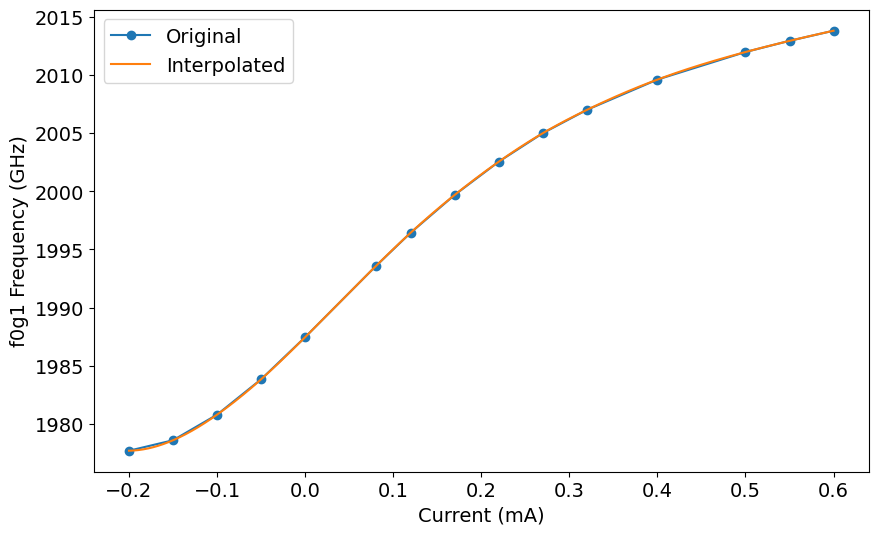

In [427]:

from scipy.interpolate import interp1d
from scipy.interpolate import UnivariateSpline, CubicSpline

# Original lists
currents = df['currents']
f0g1_freqs = df['f0g1_freqs']
pi_lengths = df['pi_lengths']

# Create interpolation function
interp_func = interp1d(currents, f0g1_freqs, kind='linear', fill_value="extrapolate")
interp_func = CubicSpline(currents, f0g1_freqs)#, k=2, s=0)

# Interpolate frequency at current of 0.55
current_to_interpolate = 0.55
interpolated_frequency = interp_func(current_to_interpolate)

print(f"Interpolated frequency at current {current_to_interpolate}: {interpolated_frequency}")
#plot 
plt.plot(currents, f0g1_freqs, 'o-', label='Original')
xdata = np.linspace(min(currents), max(currents), 1000)
plt.plot(xdata, interp_func(xdata), '-', label='Interpolated')
plt.xlabel('Current (mA)')
plt.ylabel('f0g1 Frequency (GHz)')
plt.legend()

In [397]:
interp_func(-0.05)

array(1983.86642984)

In [578]:
# Original lists
currents = df['currents']
f0g1_freqs = df['f0g1_freqs']
pi_lengths = df['pi_lengths']

# Create interpolation function
f0g1_interp_func = CubicSpline(currents, f0g1_freqs)#, kind='linear', fill_value="extrapolate")
pi_interp_func = interp1d(currents, pi_lengths)#, kind='linear', fill_value="extrapolate")

# currents
custom_currents = [0.55, 0.56, 0.575, 0.58, 0.585, 0.59, 0.595]
currents_interped = np.round(np.linspace(min(currents), max(currents), 30), 2).tolist() #+ [0.56, 0.58, 0.59]
currents_interped = np.sort(np.array(currents_interped + custom_currents))

f0g1_freqs_interped = f0g1_interp_func(currents_interped)
pi_lengths_interped = pi_interp_func(currents_interped)

interp_df = pd.DataFrame({'currents': currents_interped, 'f0g1_freqs': f0g1_freqs_interped, 'pi_lengths': pi_lengths_interped})
interp_df

,currents,f0g1_freqs,pi_lengths
0,-0.200,1977.700000,0.550453
1,-0.170,1978.054632,0.548023
2,-0.140,1978.952782,0.548341
3,-0.120,1979.797564,0.552217
4,-0.090,1981.350365,0.555395
5,-0.060,1983.176570,0.553302
6,-0.030,1985.238591,0.554070
7,-0.010,1986.708226,0.555536
8,0.020,1988.980906,0.557921
9,0.050,1991.277471,0.560400


In [406]:
interp_df['currents'].values

array([-0.2  , -0.17 , -0.14 , -0.12 , -0.09 , -0.06 , -0.03 , -0.01 ,
        0.02 ,  0.05 ,  0.08 ,  0.1  ,  0.13 ,  0.16 ,  0.19 ,  0.21 ,
        0.24 ,  0.27 ,  0.3  ,  0.32 ,  0.35 ,  0.38 ,  0.41 ,  0.43 ,
        0.46 ,  0.49 ,  0.52 ,  0.54 ,  0.55 ,  0.56 ,  0.57 ,  0.575,
        0.58 ,  0.585,  0.59 ,  0.595,  0.6  ])

In [407]:
f0g1_interp_func(0.4)

array(2009.6)

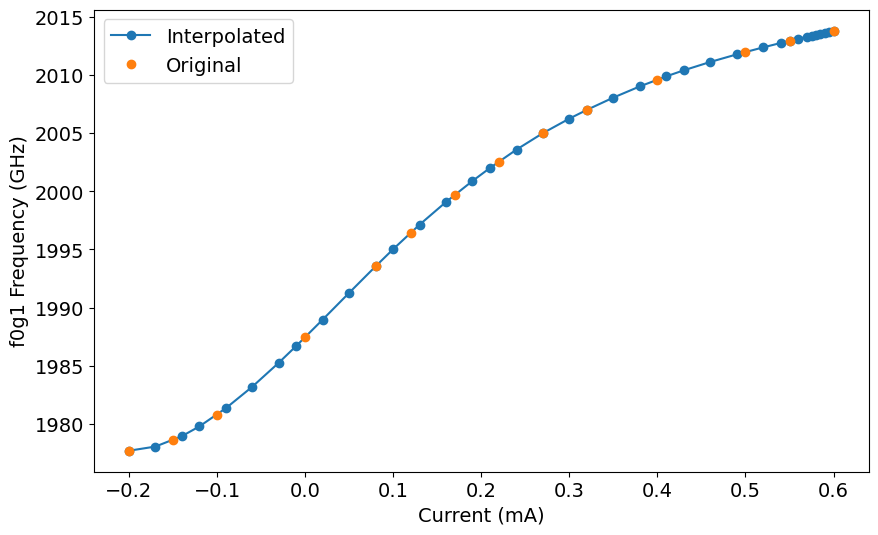

In [408]:
# compare interperted data with original data
# plt.plot(df['currents'], df['f0g1_freqs'], 'o', label='Original')
plt.plot(interp_df['currents'], interp_df['f0g1_freqs'], 'o-', label='Interpolated')
plt.plot(df['currents'], df['f0g1_freqs'], 'o', label='Original')
plt.xlabel('Current (mA)')
plt.ylabel('f0g1 Frequency (GHz)')
plt.legend()


Text(0, 0.5, 'Pi Pulse Length (us)')

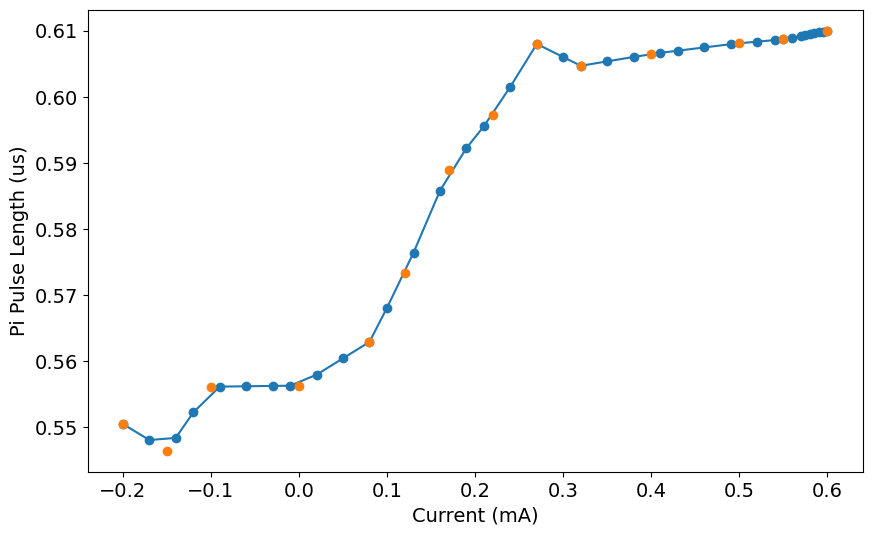

In [409]:
# compare interperted data with original data
# plt.plot(df['currents'], df['pi_lengths'], 'o', label='Original')
plt.plot(interp_df['currents'], interp_df['pi_lengths'], 'o-', label='Interpolated')
plt.plot(df['currents'], df['pi_lengths'], 'o', label='Original')
plt.xlabel('Current (mA)')
plt.ylabel('Pi Pulse Length (us)')

## Manipulate 1 T1 data

In [337]:
DC_flux_list = [-0.2 , -0.17, -0.14, -0.12, -0.09, -0.06, -0.03, -0.01,  0.02,
        0.05,  0.08,  0.1 ,  0.13,  0.16,  0.19,  0.21,  0.24,  0.27,
        0.3 ,  0.32,  0.35,  0.38,  0.41,  0.43,  0.46,  0.49,  0.52,
        0.54,  0.55,  0.56,  0.57,  0.58,  0.59,  0.6 ]
data_file_list = [8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50,52,54,56,58,60,62, 65,68,71,74,77, 79]
name = '_cavity_t1_dc_flux_sweep_new.h5'
T1_list = []
T1_err_list = []
for ii in data_file_list:
        full_name = str(ii).zfill(5)+name
        try:
                temp_data, attrs = prev_data(expt_path, full_name) 
                temp_data['fit_avgi'], temp_data['fit_err_avgi'] = fitter.fitexp(temp_data['xpts'][:-1], temp_data['avgi'][:-1], fitparams=None)
                T1_list.append(temp_data['fit_avgi'][-1])
                T1_err_list.append(np.sqrt(temp_data['fit_err_avgi'][3][3]))
        except FileNotFoundError:
                print(f'File {full_name} not found')
                continue

C:\_Lib\python\multimode_expts\experiments\fitting.py:55: RuntimeWarning: overflow encountered in exp
  return y0 + yscale*np.exp(-(x-x0)/decay)


Text(0, 0.5, 'T1 (us)')

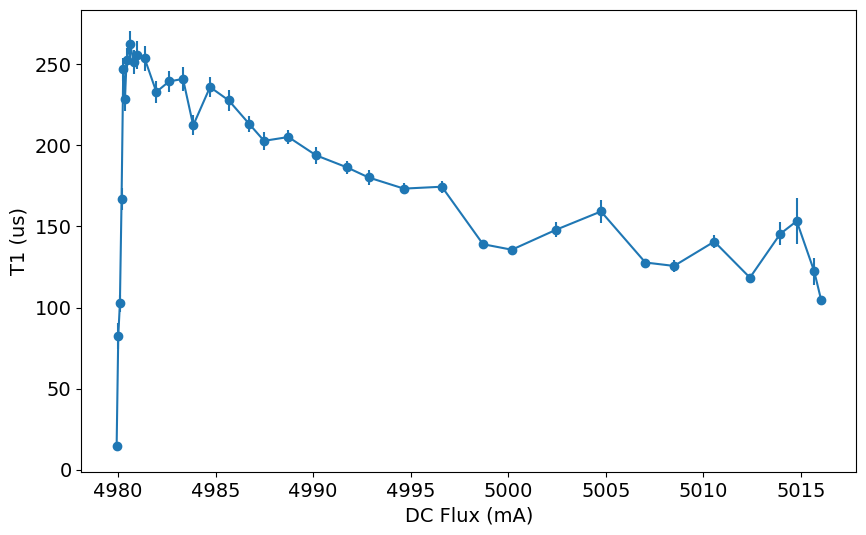

In [455]:
qubit_gf = yaml_cfg.device.qubit.f_ge[0] + yaml_cfg.device.qubit.f_ef[0]
xdata = qubit_gf - np.array(f0g1_interp_func(DC_flux_list))

plt.errorbar(xdata, T1_list, yerr=T1_err_list, fmt='o-')
plt.xlabel('DC Flux (mA)')
plt.ylabel('T1 (us)')

In [351]:



name = '_cavity_t1_dc_flux_sweep_new.h5'
T1_list = []
T1_err_list = []
for ii in data_file_list:
        full_name = str(ii).zfill(5)+name
        try:
                temp_data, attrs = prev_data(expt_path, full_name) 
                temp_data['fit_avgi'], temp_data['fit_err_avgi'] = fitter.fitexp(temp_data['xpts'][:-1], temp_data['avgi'][:-1], fitparams=None)
                T1_list.append(temp_data['fit_avgi'][-1])
                T1_err_list.append(np.sqrt(temp_data['fit_err_avgi'][3][3]))
        except FileNotFoundError:
                print(f'File {full_name} not found')
                continue

Text(0.5, 1.0, 'Cache 1 T1 vs DC Flux')

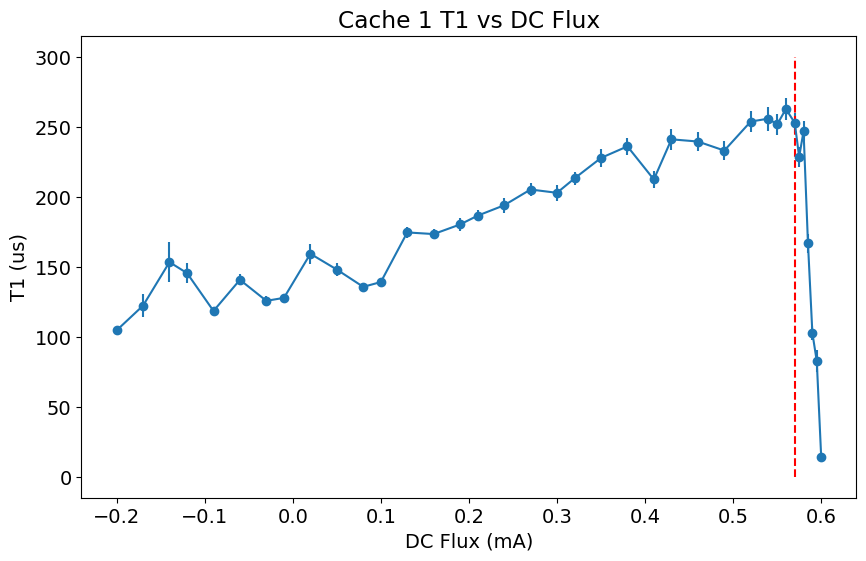

In [984]:
plt.errorbar(DC_flux_list, T1_list, yerr=T1_err_list, fmt='o-')
plt.vlines(0.57, 0, 300, colors='r', linestyles='dashed')
plt.xlabel('DC Flux (mA)')
plt.ylabel('T1 (us)')
plt.title('Cache 1 T1 vs DC Flux')

# Coupler DC Flux Scan

## Single scans

Found peak in amps at [MHz] 2123.889714612176, HWHM 1.6160220884529648
Found peak in I at [MHz] 2124.0935238646284, HWHM 2.450277004678673
Found peak in Q at [MHz] 2124.1321709119, HWHM 2.391808524829714


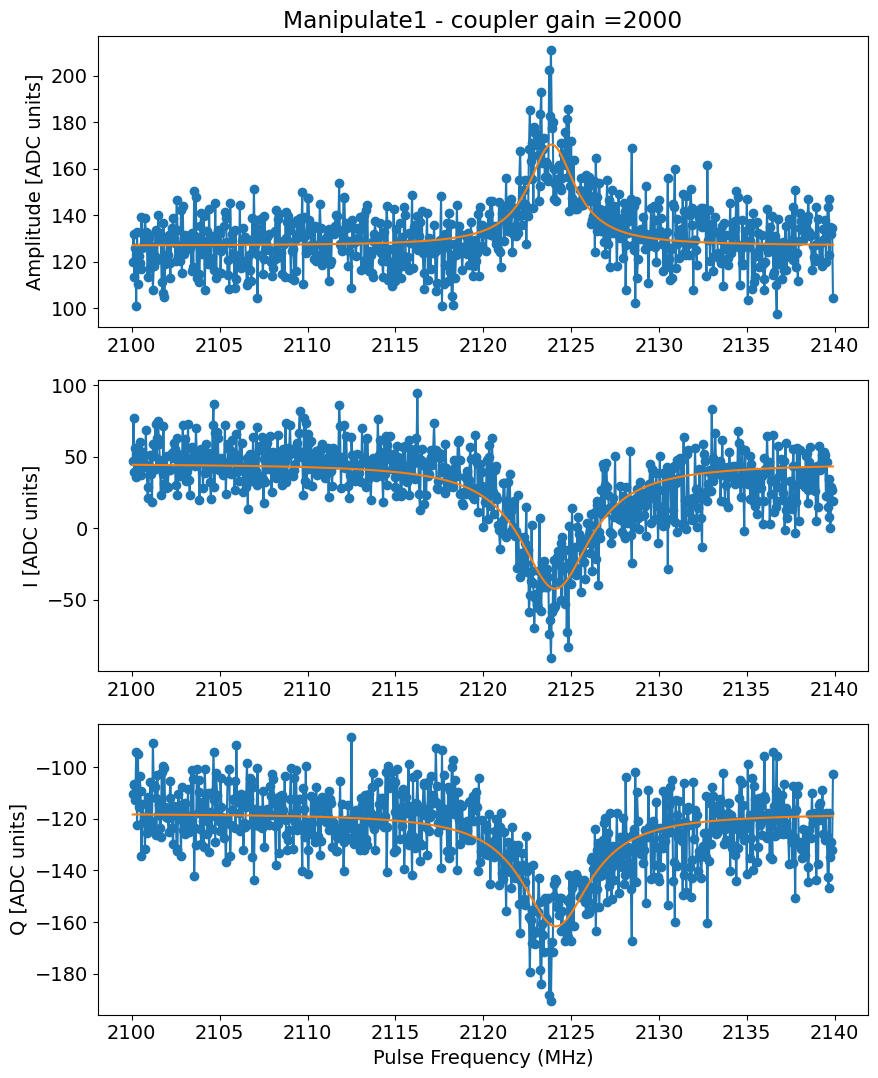

In [943]:
temp_data, attrs = prev_data(expt_path, '00034_FluxSpectroscopyF0g1Experiment.h5')
# temp_data, attrs = prev_data(expt_path, '00012_fluxspectroscopy_f0g1_dc_flux_sweep.h5')

qubit_spectroscopy_display(temp_data, title='Manipulate1 - coupler gain =' + str(attrs['config']['expt']['flux_drive'][2]), vlines=None)


## Sweep

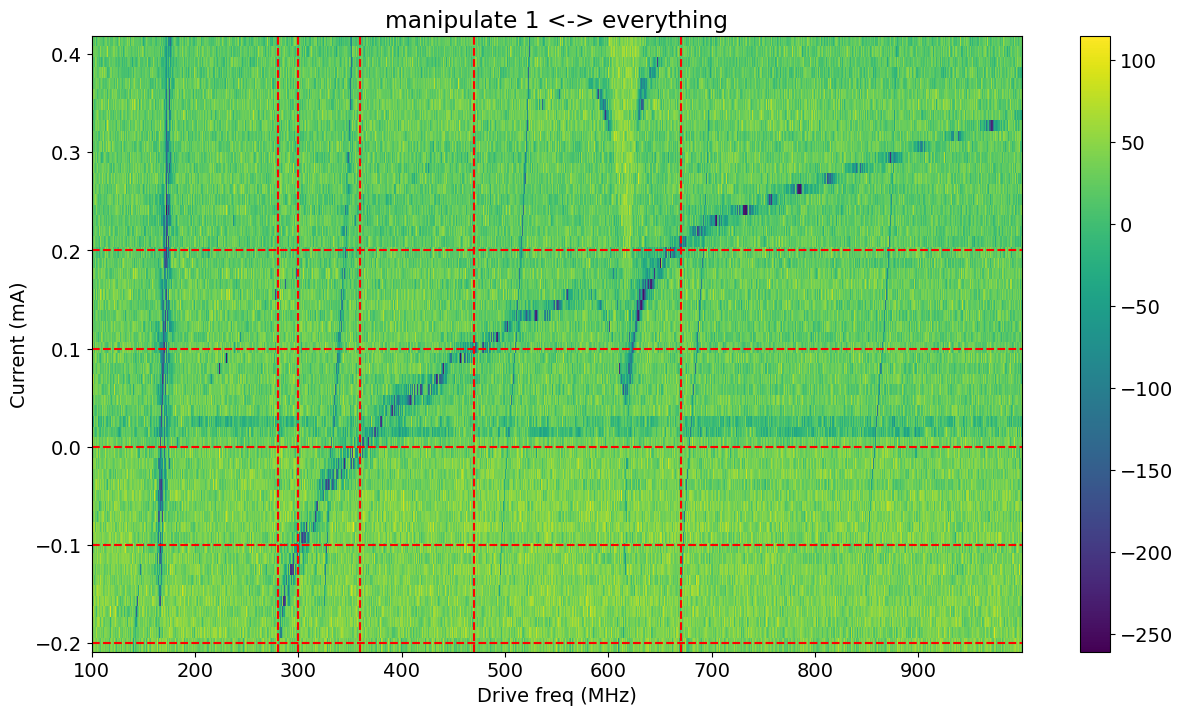

In [573]:
file_list = np.arange(7,67,1)
y_list = []
freq_list = []
name = '_fluxspectroscopy_f0g1_dc_flux_sweep.h5'
for file_no in file_list:
    full_name = str(file_no).zfill(5)+name
    try: 
        temp_data, attrs = prev_data(expt_path, full_name)  # ef
        signal_y = temp_data['avgi']
        len_x = temp_data['xpts']
        y_list.append(signal_y)
        freq_list.append(attrs['config']['expt']['current'])
    except FileNotFoundError:
        print(f'File {full_name} not found')
        continue

plot_f0g1_sweep(len_x, freq_list, np.array(y_list), hlines=[-0.2, -0.1, 0, 0.1, 0.2], vlines=[280, 300, 360, 470, 670], title="manipulate 1 <-> everything")

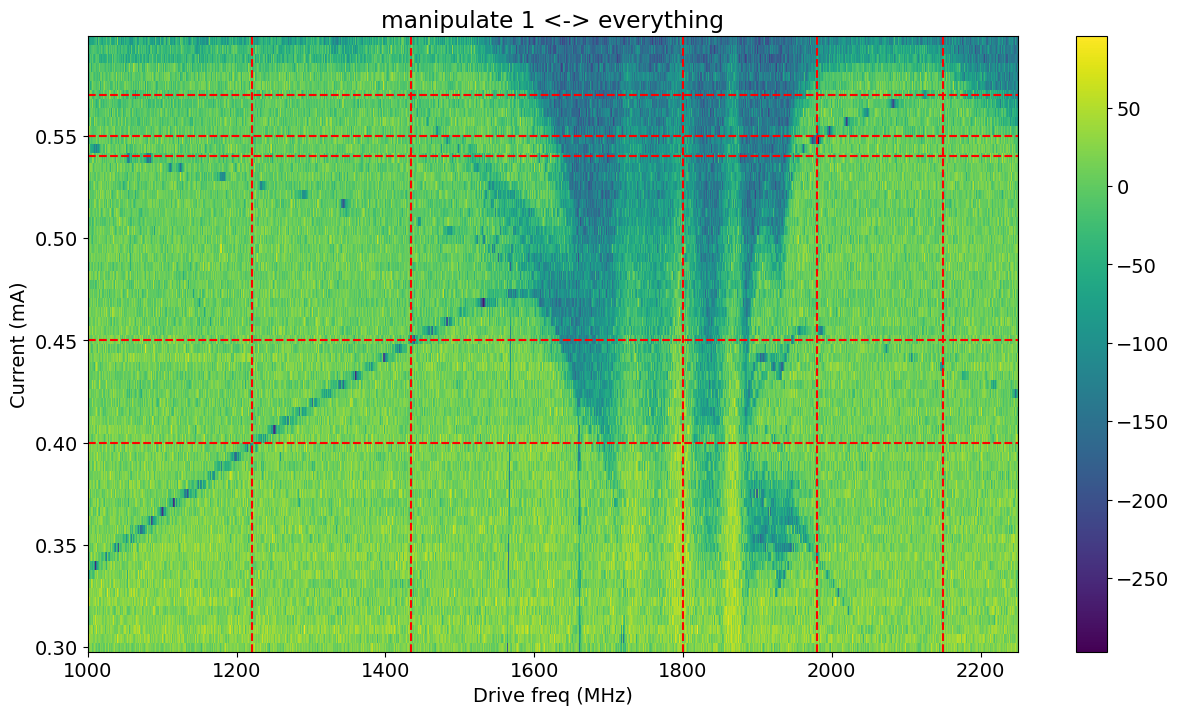

In [942]:
file_list = np.arange(67,135,1)
y_list = []
freq_list = []
name = '_fluxspectroscopy_f0g1_dc_flux_sweep.h5'
for file_no in file_list:
    full_name = str(file_no).zfill(5)+name
    try: 
        temp_data, attrs = prev_data(expt_path, full_name)  # ef
        signal_y = temp_data['avgi']
        len_x = temp_data['xpts']
        y_list.append(signal_y)
        freq_list.append(attrs['config']['expt']['current'])
    except FileNotFoundError:
        print(f'File {full_name} not found')
        continue

plot_f0g1_sweep(len_x, freq_list, np.array(y_list), hlines=[0.4, 0.45, 0.55, 0.54, 0.57], vlines=[1220, 1435, 1980, 1800, 2150], title="manipulate 1 <-> everything")

Plotting mant1 as a func of dressed detuning

In [580]:
rough_currents = [0.33, 0.2,-0.2, -0.1, 0, 0.1, 0.4, 0.45, 0.55,]
rough_freqs = [971, 670, 280, 300, 360, 470, 1220, 1435, 1980]
# Combine the lists and sort by currents
combined = sorted(zip(rough_currents, rough_freqs))

# Unzip the combined list back into separate lists
rough_currents, rough_freqs = zip(*combined)

# Convert back to lists
rough_currents = list(rough_currents)
rough_freqs = list(rough_freqs)

# make a cubic spline interpolation
coupler_func = CubicSpline(rough_currents, rough_freqs)#, kind='linear', fill_value="extrapolate")

# raw data for t1 
DC_flux_list = [-0.2  , -0.17 , -0.14 , -0.12 , -0.09 , -0.06 , -0.03 , -0.01 ,
        0.02 ,  0.05 ,  0.08 ,  0.1  ,  0.13 ,  0.16 ,  0.19 ,  0.21 ,
        0.24 ,  0.27 ,  0.3  ,  0.32 ,  0.35 ,  0.38 ,  0.41 ,  0.43 ,
        0.46 ,  0.49 ,  0.52 ,  0.54 ,  0.55 ,  0.56 ,  0.57 ,  0.575,
        0.58 ,  0.585,  0.59 ,  0.595,  0.6  ]
data_file_list = [82, 84, 86, 88, 90, 92, 94, 96, 98, 100, 102, 104, 106, 108,
                  110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130, 132, 134, 136,
                  139, 142,145,148,151,154,157,160, 162]

# plot t1 data as a func of dressed detung 
qubit_gf = yaml_cfg.device.qubit.f_ge[0] + yaml_cfg.device.qubit.f_ef[0]
man_freq_list = qubit_gf - np.array(f0g1_interp_func(DC_flux_list))
coupler_freq_list = coupler_func(DC_flux_list)

dressed_detung_list = man_freq_list - coupler_freq_list

# getting y data 
name = '_cavity_t1_dc_flux_sweep_new.h5'
T1_list = []
T1_err_list = []
for ii in data_file_list:
        full_name = str(ii).zfill(5)+name
        try:
                temp_data, attrs = prev_data(expt_path, full_name) 
                temp_data['fit_avgi'], temp_data['fit_err_avgi'] = fitter.fitexp(temp_data['xpts'][:-1], temp_data['avgi'][:-1], fitparams=None)
                T1_list.append(temp_data['fit_avgi'][-1])
                T1_err_list.append(np.sqrt(temp_data['fit_err_avgi'][3][3]))
        except FileNotFoundError:
                print(f'File {full_name} not found')
                continue



In [714]:
f0g1_interp_func(0.53)

array(2012.55830495)

In [584]:
dressed_detung_list

array([4736.03157047, 4734.43185655, 4728.10106399, 4721.4324497 ,
       4708.0273206 , 4690.83272473, 4670.13806228, 4654.55754357,
       4628.61677241, 4597.95278944, 4559.75378608, 4528.70469979,
       4472.95087718, 4409.78359536, 4343.97434853, 4300.93379961,
       4237.6924909 , 4172.07724397, 4099.5143969 , 4044.99191503,
       3950.92849062, 3842.69984828, 3723.2245599 , 3638.03651743,
       3500.68928762, 3350.05567803, 3184.10206569, 3063.95401808,
       3000.80157047, 2935.49696588, 2867.96529849, 2833.34090817,
       2798.13166247, 2762.32819814, 2725.92115197, 2688.90116073,
       2651.25886119])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


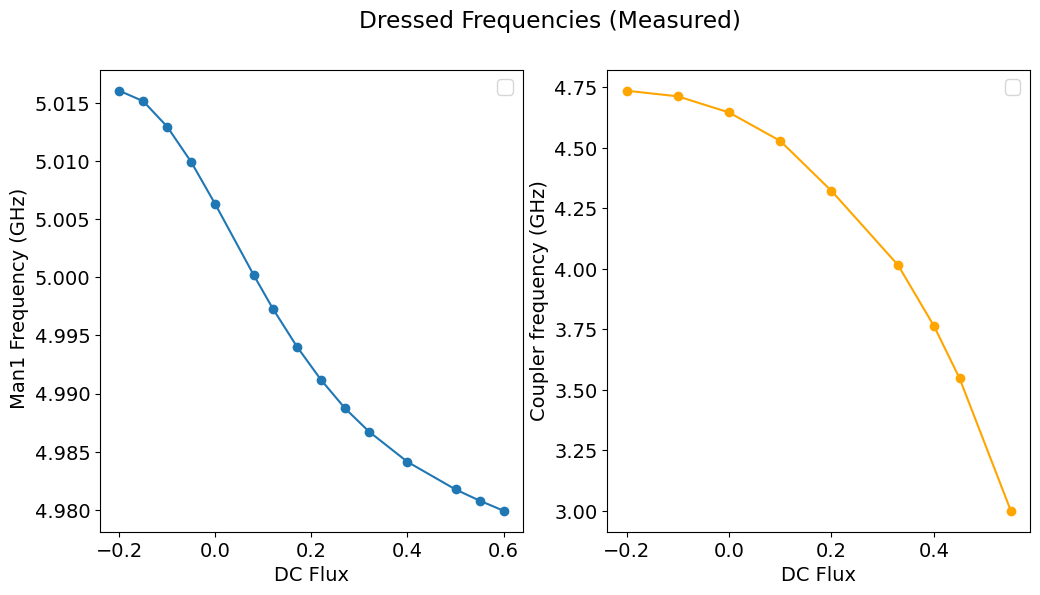

In [613]:
 #Create figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot f0g1_freqs vs DC_flux_list on the first axis
ax1.plot(df['currents'], (qubit_gf - df['f0g1_freqs']) * 1e-3, '-o')
ax1.set_xlabel('DC Flux')
ax1.set_ylabel(' Man1 Frequency (GHz)')
ax1.legend()

# Plot pi_lengths vs DC_flux_list on the second axis
ax2.plot(rough_currents, (qubit_gf - (f0g1_interp_func(rough_currents)) -rough_freqs) * 1e-3,'-o', color='orange')
ax2.set_xlabel('DC Flux')
ax2.set_ylabel('Coupler frequency (GHz)')
# ax2.set_title('pi_lengths vs DC Flux')
plt.suptitle('Dressed Frequencies (Measured)')
ax2.legend()
# plt.yscale('log')

Text(0.5, 1.0, 'Manipulate T1')

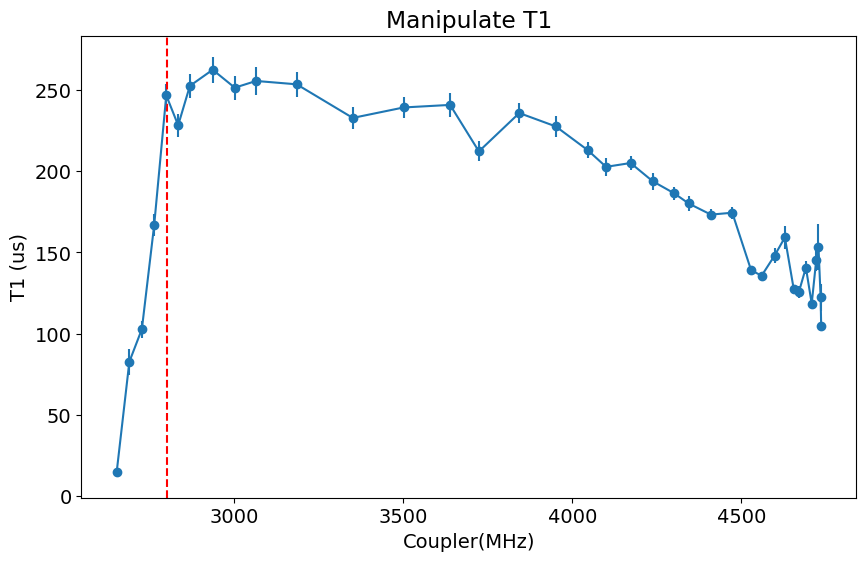

In [698]:
# plt.errorbar(coupler_freq_list, T1_list, yerr=T1_err_list, fmt='o-')
plt.errorbar((qubit_gf - (f0g1_interp_func(DC_flux_list)) -coupler_func(DC_flux_list)), T1_list, yerr=T1_err_list, fmt='o-')
plt.axvline(x=2800, color='r', linestyle='--')
# plt.yscale('log')
# plt.xscale('log')
plt.xlabel('Coupler(MHz)')
plt.ylabel('T1 (us)')
plt.title('Manipulate T1')


In [712]:
coupler_func(0.53)

array(1856.14405098)

# Coupler T1

## Sideband General Sweep

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


File 00719_sideband_general_sweep.h5 not found


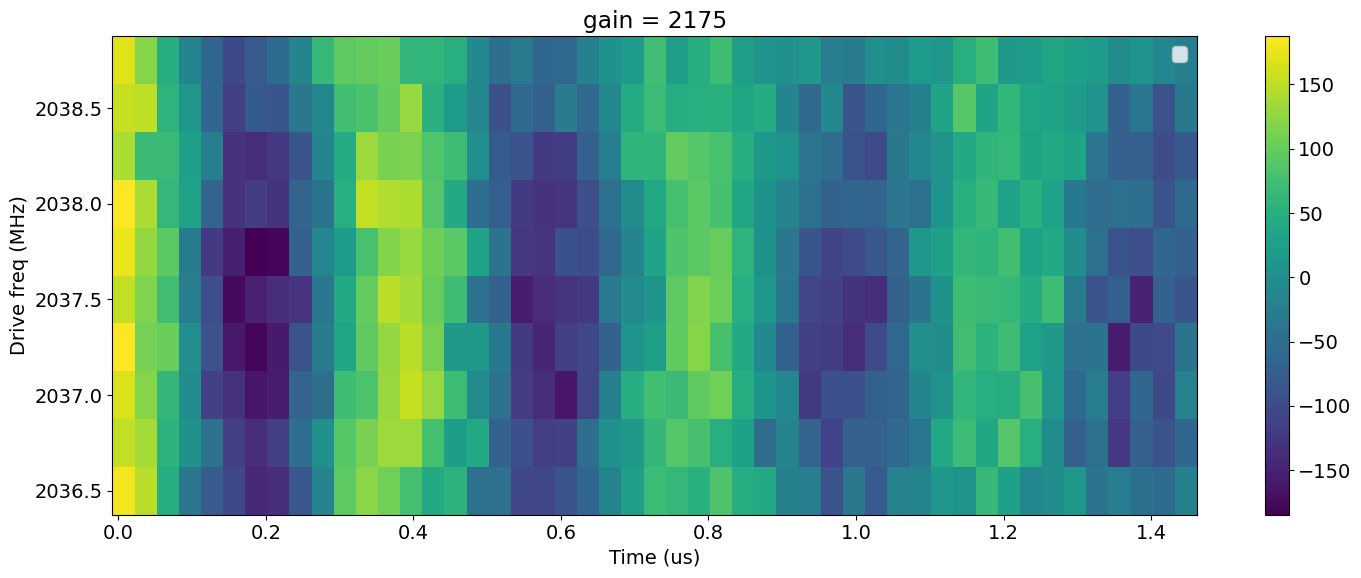

In [998]:
# file_list = np.arange(427, 450, 1) # -------
# file_list =  np.arange(331, 420, 1)# -------
# file_list =  np.arange(487, 494, 1)
# file_list = np.arange(494, 510, 1) # -------
# file_list = np.arange(504, 517, 1)
file_list =  np.arange(277, 320, 1)
# file_list = np.arange(680, 696, 1)
file_list = np.arange(709, 720, 1)
# file_list = np.arange(696, 720, 1)
# file_list = np.concatenate(([618],np.arange(600,611,1), np.arange(576, 581,1), [571,572,573,574],
#                              np.arange(553, 570, 1)))
y_list = []
freq_list = []
name = '_sideband_general_sweep.h5'
normalize = False


for file_no in file_list:
    full_name = str(file_no).zfill(5)+name
    try:
        temp_data, attrs = prev_data(expt_path, full_name)  # ef
        signal_y = temp_data['avgi'][0:-1]

        
        len_x = temp_data['xpts'][0:-1]
        y_list.append(signal_y)
        freq_list.append(attrs['config']['expt']['flux_drive'][1])
    except FileNotFoundError:
        print(f'File {full_name} not found')
        continue

plot_sideband_sweep(len_x, freq_list, np.array(y_list), hlines=[], vlines=None, normalize = normalize, title="gain = " + str(attrs['config']['expt']['flux_drive'][2]))

In [938]:
coupler_func(0.57)

array(2112.47897692)

In [916]:
attrs

{'config': {'prepulse_qubit': {'freq': [3568.1751638611518],
   'length': [0.06],
   'gain': [30],
   'phase': [0],
   'repeat_time': 10},
  'device': {'qubit': {'T1': [127.0],
    'f_ge': [3568.1751638611518],
    'f_ge_resolved': [3568.1751638611518],
    'f_ge_idle': [3568.1751638611518],
    'f_ef': [3425.5564066067],
    'f_ef_idle': [3425.5564066067],
    'ramp_sigma': [0.005],
    'ramp_sigma_num': [3],
    'pulses': {'pi_ge': {'gain': [10716],
      'sigma': [0.035],
      'length': [0],
      'type': ['gauss']},
     'pi_ge_ftop': {'gain': [3000],
      'sigma': [0.005],
      'length': [0.190914187445986],
      'type': ['flat_top']},
     'pi_ge_fast': {'gain': [10682],
      'sigma': [0.035],
      'length': [0],
      'type': ['gauss']},
     'pi_ge_resolved': {'gain': [50],
      'sigma': [0.005],
      'length': [6.553697146578866],
      'type': ['flat_top'],
      'repeat_no': [1]},
     'hpi_ge': {'gain': [5510],
      'length': [0],
      'sigma': [0.035],
      'typ

In [640]:
g = 80 
delta = 1300
alpha = 80 
(g/delta)**2 * alpha

0.30295857988165686

In [689]:
T1_meas = 100
T1_pure = 250
Tq = 50 
delta = 300

g = np.sqrt(Tq * ((1/T1_meas) - (1/T1_pure))) * delta
g

164.31676725154983

### Sideband General 

[193.59230278   2.57506481  91.85425947   3.29480072  -4.54465304
  -0.47208218]
Decay from avgi [us] 3.2948007160877464
Rate [MHz] 2.575064812507612
Pi length from avgi data [us]: 0.19216964048332671
	Pi/2 length from avgi data [us]: 0.0950847054612258
Fit params:  [193.59230278   2.57506481  91.85425947   3.29480072  -4.54465304
  -0.47208218]

Decay from avgq [us] 2.05659252366273
Rate [MHz] 2.5601856626330153
Pi length from avgq data [us]: 0.19206468307919844
Pi/2 length from avgq data [us]: 0.09603234153959922
Fit params:  [173.63606818   2.56018566  92.98035075   2.05659252 -76.09565255
  -0.473     ]


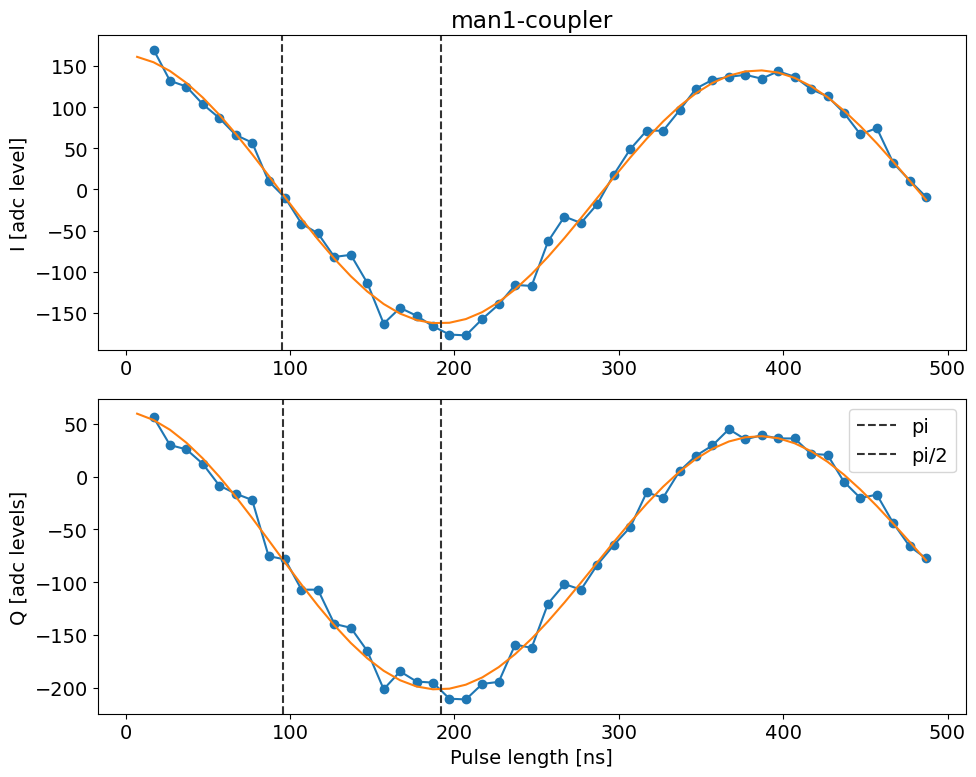

In [1007]:

temp_data, attrs = prev_data(expt_path, '00010_SidebandGeneralExperiment.h5')  #
Ilist2 = length_rabi_display(temp_data, fit=True, fitparams=[None, None,None,None,None,None ],
                              vlines = [],
                      normalize= [False, 'g_data', 'f_data'],
                       active_reset = False,  title='man1-coupler')

In [1000]:
attrs

{'config': {'prepulse_qubit': {'freq': [3568.1751638611518],
   'length': [0.06],
   'gain': [30],
   'phase': [0],
   'repeat_time': 10},
  'device': {'qubit': {'T1': [127.0],
    'f_ge': [3568.1751638611518],
    'f_ge_resolved': [3568.1751638611518],
    'f_ge_idle': [3568.1751638611518],
    'f_ef': [3425.5564066067],
    'f_ef_idle': [3425.5564066067],
    'ramp_sigma': [0.005],
    'ramp_sigma_num': [3],
    'pulses': {'pi_ge': {'gain': [10716],
      'sigma': [0.035],
      'length': [0],
      'type': ['gauss']},
     'pi_ge_ftop': {'gain': [3000],
      'sigma': [0.005],
      'length': [0.190914187445986],
      'type': ['flat_top']},
     'pi_ge_fast': {'gain': [10682],
      'sigma': [0.035],
      'length': [0],
      'type': ['gauss']},
     'pi_ge_resolved': {'gain': [50],
      'sigma': [0.005],
      'length': [6.553697146578866],
      'type': ['flat_top'],
      'repeat_no': [1]},
     'hpi_ge': {'gain': [5510],
      'length': [0],
      'sigma': [0.035],
      'typ

### Coupler T1

Fit T1 avgi [us]: 40.84634863763371
Fit T1 avgq [us]: 40.80097325126168


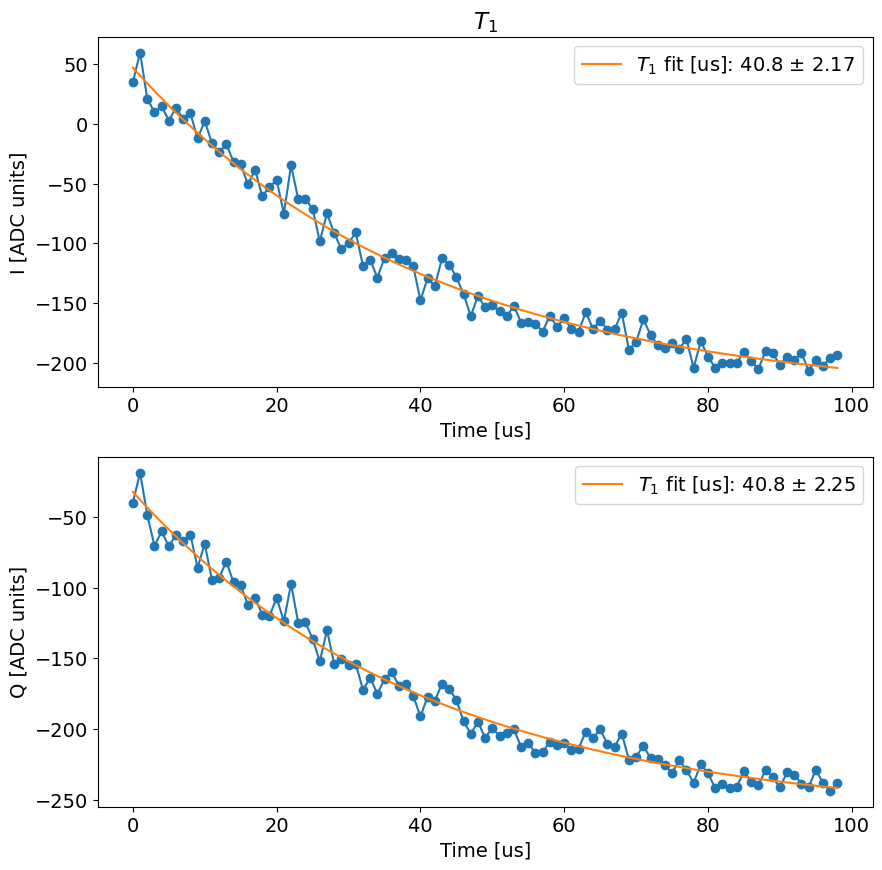

(40.80097325126168, 2.2466910112961345)

In [1004]:

temp_data, attrs = prev_data(expt_path, '00007_SidebandT1GeneralExperiment.h5')
t1_display(data = temp_data, attrs = attrs, fit = True, active_reset = False)


In [1005]:
10/((0.08/3)**2)

14062.499999999996

In [1006]:
attrs

{'config': {'prepulse_qubit': {'freq': [3568.1751638611518],
   'length': [0.06],
   'gain': [30],
   'phase': [0],
   'repeat_time': 10},
  'device': {'qubit': {'T1': [127.0],
    'f_ge': [3568.1751638611518],
    'f_ge_resolved': [3568.1751638611518],
    'f_ge_idle': [3568.1751638611518],
    'f_ef': [3425.5564066067],
    'f_ef_idle': [3425.5564066067],
    'ramp_sigma': [0.005],
    'ramp_sigma_num': [3],
    'pulses': {'pi_ge': {'gain': [10716],
      'sigma': [0.035],
      'length': [0],
      'type': ['gauss']},
     'pi_ge_ftop': {'gain': [3000],
      'sigma': [0.005],
      'length': [0.190914187445986],
      'type': ['flat_top']},
     'pi_ge_fast': {'gain': [10682],
      'sigma': [0.035],
      'length': [0],
      'type': ['gauss']},
     'pi_ge_resolved': {'gain': [50],
      'sigma': [0.005],
      'length': [6.553697146578866],
      'type': ['flat_top'],
      'repeat_no': [1]},
     'hpi_ge': {'gain': [5510],
      'length': [0],
      'sigma': [0.035],
      'typ

#### Prepulse manipulation

In [1008]:
f0g1_interp_func(0.56)

array(2013.11034003)

In [961]:
f0g1 = 2013.11034003
coup = 2037.25




f0g1_length = 0.609
coup_length = 0.19216964048332671
coup_gain = 2175

In [981]:
# for sideband/spec experiment 
from MM_base import *
basee = MM_base(yaml_cfg)
prepulse_str = [['qubit', 'ge', 'pi',0], 
                 ['qubit',  'ef', 'pi', 0],
                ['man', 'M1', 'pi',  0],
                ]
post_pulse_str = [
                  ['man', 'M1', 'pi', 0],
                  # ['qubit',  'ef', 'pi', 0],
                # ['qubit', 'ge', 'hpi',0].
                ]
creator = basee.get_prepulse_creator(prepulse_str)
post_creator = basee.get_prepulse_creator(post_pulse_str)

pre_sweep_pulse = creator.pulse.tolist()
# change f0g1 freq, length and coupler sidebandfreq and length
pre_sweep_pulse[0][-1] = f0g1
# pre_sweep_pulse[0][-1] = coup
pre_sweep_pulse[2][-1] = f0g1_length
# pre_sweep_pulse[2][-1] = coup_length

# do same for postpulse 
post_sweep_pulse = post_creator.pulse.tolist()
# post_sweep_pulse[0][0] = coup
# post_sweep_pulse[2][0] = coup_length
post_sweep_pulse[0][0] = f0g1
post_sweep_pulse[2][0] = f0g1_length

# return 
print('pre_sweep_pulse:', pre_sweep_pulse)
print('post_sweep_pulse:', post_sweep_pulse)

pre_sweep_pulse: [[3568.1751638611518, 3425.5564066067, 2013.28729505], [10716, 8236, 15000], [0, 0, 0.609], [0, 0, 0], [2, 2, 0], ['g', 'g', 'flat_top'], [0.035, 0.035, 0.005]]
post_sweep_pulse: [[2013.28729505], [15000], [0.609], [0], [0], ['flat_top'], [0.005]]


In [963]:
coupler_func(0.56)

array(2045.12426456)

In [964]:
# for sideband t1 experiment
basee = MM_base(yaml_cfg)
prepulse_str = [['qubit', 'ge', 'pi',0], 
                 ['qubit',  'ef', 'pi', 0],
                ['man', 'M1', 'pi',  0],
                ['storage', 'M1-S5', 'pi', 0 ]]
post_pulse_str = [['storage', 'M1-S5', 'pi', 0], 
                  ['man', 'M1', 'pi', 0]]
creator = basee.get_prepulse_creator(prepulse_str)
post_creator = basee.get_prepulse_creator(post_pulse_str)

pre_sweep_pulse = creator.pulse.tolist()
# change f0g1 freq, length and coupler sidebandfreq and length
pre_sweep_pulse[0][-2] = f0g1
pre_sweep_pulse[0][-1] = coup
pre_sweep_pulse[2][-2] = f0g1_length
pre_sweep_pulse[2][-1] = coup_length
pre_sweep_pulse[1][-1] = coup_gain

# do same for postpulse 
post_sweep_pulse = post_creator.pulse.tolist()
post_sweep_pulse[0][0] = coup
post_sweep_pulse[2][0] = coup_length
post_sweep_pulse[1][0] = coup_gain
post_sweep_pulse[0][1] = f0g1
post_sweep_pulse[2][1] = f0g1_length

# return 
print('pre_sweep_pulse:', pre_sweep_pulse)
print('post_sweep_pulse:', post_sweep_pulse)

pre_sweep_pulse: [[3568.1751638611518, 3425.5564066067, 2013.28729505, 2133], [10716, 8236, 15000, 5000], [0, 0, 0.609, 0.1325733577876808], [0, 0, 0, 0], [2, 2, 0, 3], ['g', 'g', 'flat_top', 'flat_top'], [0.035, 0.035, 0.005, 0.005]]
post_sweep_pulse: [[2133, 2013.28729505], [5000, 15000], [0.1325733577876808, 0.609], [0, 0], [3, 0], ['flat_top', 'flat_top'], [0.005, 0.005]]


In [891]:
# for ramsey experiment
basee = MM_base(yaml_cfg)
prepulse_str = [
                ['storage', 'M1-S5', 'pi', 0 ]]
post_pulse_str = [['storage', 'M1-S5', 'pi', 0], 
                  ]
creator = basee.get_prepulse_creator(prepulse_str)
post_creator = basee.get_prepulse_creator(post_pulse_str)

pre_sweep_pulse = creator.pulse.tolist()
# change f0g1 freq, length and coupler sidebandfreq and length
# pre_sweep_pulse[0][-2] = f0g1
pre_sweep_pulse[0][-1] = coup
# pre_sweep_pulse[2][-2] = f0g1_length
pre_sweep_pulse[2][-1] = coup_length
pre_sweep_pulse[1][-1] = coup_gain

# do same for postpulse 
# post_sweep_pulse = post_creator.pulse.tolist()
# post_sweep_pulse[0][0] = coup
# post_sweep_pulse[2][0] = coup_length
# post_sweep_pulse[1][0] = coup_gain
# post_sweep_pulse[0][1] = f0g1
# post_sweep_pulse[2][1] = f0g1_length

# return 
print('pre_sweep_pulse:', pre_sweep_pulse)
# print('post_sweep_pulse:', post_sweep_pulse)

pre_sweep_pulse: [[2037.35], [2175], [0.19302707], [0], [3], ['flat_top'], [0.005]]


In [504]:
creator.pulse.tolist()

[[3568.1751638611518, 3425.5564066067, 2007.06, 349.415],
 [10716, 8236, 15000, 3000],
 [0, 0, 0.651287, 0.9771428571428572],
 [0, 0, 0, 0],
 [2, 2, 0, 1],
 ['g', 'g', 'flat_top', 'flat_top'],
 [0.035, 0.035, 0.005, 0.005]]

In [501]:
yaml_cfg

{'prepulse_qubit': {'freq': [3568.1751638611518],
  'length': [0.06],
  'gain': [30],
  'phase': [0],
  'repeat_time': 10},
 'device': {'qubit': {'T1': [127.0],
   'f_ge': [3568.1751638611518],
   'f_ge_resolved': [3568.1751638611518],
   'f_ge_idle': [3568.1751638611518],
   'f_ef': [3425.5564066067],
   'f_ef_idle': [3425.5564066067],
   'ramp_sigma': [0.005],
   'ramp_sigma_num': [3],
   'pulses': {'pi_ge': {'gain': [10716],
     'sigma': [0.035],
     'length': [0],
     'type': 'gauss'},
    'pi_ge_ftop': {'gain': [3000],
     'sigma': [0.005],
     'length': [0.190914187445986],
     'type': 'flat_top'},
    'pi_ge_fast': {'gain': [10682],
     'sigma': [0.035],
     'length': [0],
     'type': 'gauss'},
    'pi_ge_resolved': {'gain': [50],
     'sigma': [0.005],
     'length': [6.553697146578866],
     'type': 'flat_top',
     'repeat_no': 1},
    'hpi_ge': {'gain': [5510],
     'length': [0],
     'sigma': [0.035],
     'type': 'gauss'},
    'hpi_ge_ftop': {'gain': [3000],
    

# Coupler T2

Attempted to init fitparam 1 to 124.57912457912461, which is out of bounds 0.34013605442176875 to 51.02040816326531. Instead init to 25.68027210884354
Current pi pulse frequency: 2006.72
Fit frequency from I [MHz]: 17.819498165176128 +/- 0.03735164747932818
Suggested new pi pulse frequency from fit I [MHz]:
 	2008.900501834824
 	2044.5394981651762
T2 Ramsey from fit I [us]: 0.3866780282174555
Fit frequency from Q [MHz]: 18.242476441315727 +/- 0.5466455048443452
Suggested new pi pulse frequencies from fit Q [MHz]:
 	2008.4775235586842
 	2044.9624764413159
T2 Ramsey from fit Q [us]: 0.24556630085866016


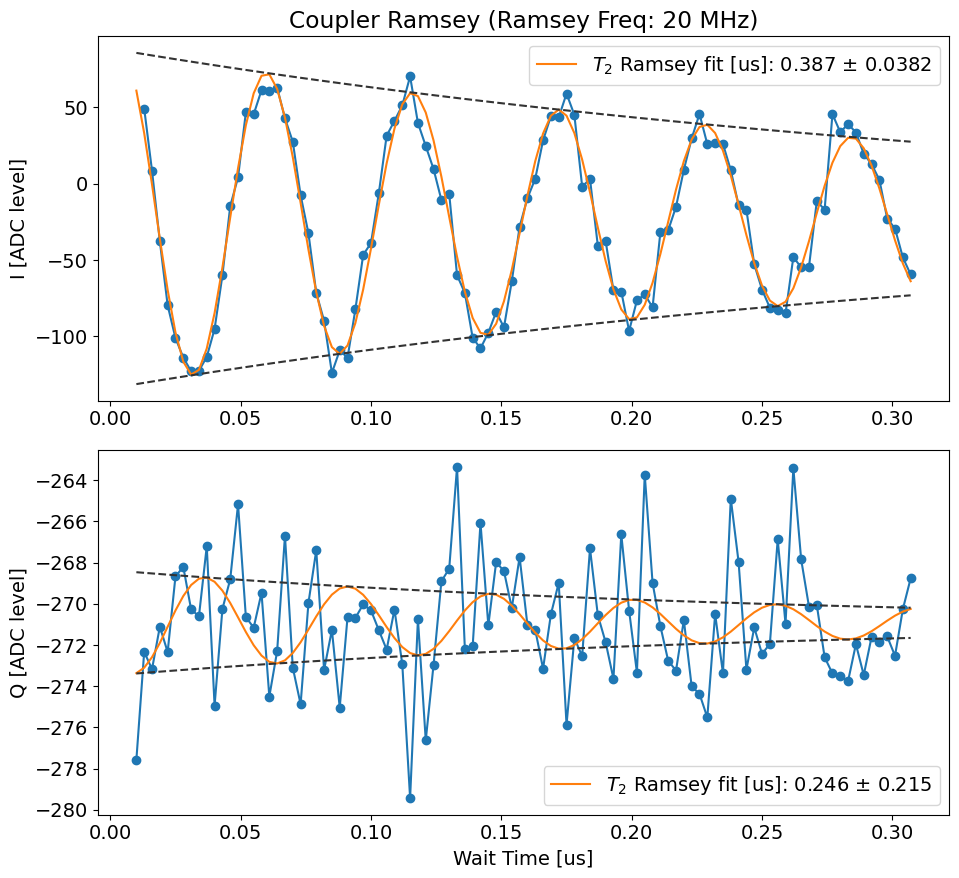

In [925]:
temp_data, attrs = prev_data(expt_path, '00022_CavityRamseyExperiment.h5')
# temp_data, attrs = prev_data(expt_path, '00207_CavityRamseyExperiment.h5')
Ramsey_display(temp_data, attrs, ramsey_freq=attrs['config']['expt']['ramsey_freq'], 
               active_reset=False, threshold=-4.323194812977462, readouts_per_rep=4, initial_freq=attrs['config']['expt']['user_defined_pulse'][1], fit=True, fitparams = None, title='Coupler Ramsey')